In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import (train_test_split, 
                                    cross_val_score)

from IPython.display import (SVG, display, HTML)
from graphviz import Source

In [2]:
train_df = pd.read_csv('titanic_kaggle/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
X = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True


In [4]:
y = train_df.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [7]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8238255033557047

In [8]:
clf.score(X_test, y_test)

0.8203389830508474

In [9]:
max_depth_values = range(1, 100)

In [10]:
score_data_list = []
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score], 
                                    'cross_val_score': [mean_cross_val_score]})
    score_data_list.append(temp_score_data)
scores_data = pd.concat(score_data_list)

In [11]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.795350


In [17]:
scores_data_long = pd.melt(scores_data, 
                           id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'], 
                           var_name='set_type', value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [19]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.795350
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.802059
205,8,cross_val_score,0.800364
206,9,cross_val_score,0.793641
207,10,cross_val_score,0.800350


<Axes: xlabel='max_depth', ylabel='score'>

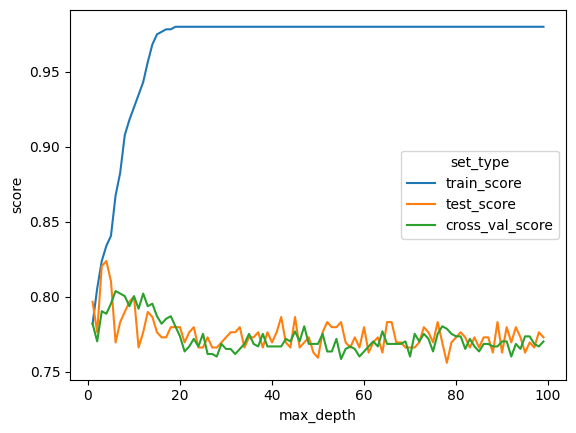

In [18]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [22]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.8033898305084746

# Самостоятельная работа на ирисах

In [77]:
iris_train_df = pd.read_csv('train_iris.csv', index_col=0)
iris_train_df.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [78]:
X_iris_train = iris_train_df.drop(['species'], axis=1)
y_iris_train = iris_train_df.species

In [79]:
iris_test_df = pd.read_csv('test_iris.csv', index_col=0)
iris_test_df.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [80]:
X_iris_test = iris_test_df.drop(['species'], axis=1)
y_iris_test = iris_test_df.species

In [88]:
rs = np.random.seed(0) 
iris_score_data_list = []
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_iris_train, y_iris_train)
    iris_train_score = clf.score(X_iris_train, y_iris_train)
    iris_test_score = clf.score(X_iris_test, y_iris_test)
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [iris_train_score], 
                                    'test_score': [iris_test_score]})
    iris_score_data_list.append(temp_score_data)
iris_scores_data = pd.concat(iris_score_data_list)
iris_scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [90]:
# iris_scores_data_long = pd.melt(iris_scores_data, 
#                            id_vars=['max_depth'], 
#                            value_vars=['score', 'test'])
iris_scores_data_long = pd.melt(iris_scores_data, 
                           id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score'], 
                           var_name='set_type', value_name='score')
iris_scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


<Axes: xlabel='max_depth', ylabel='score'>

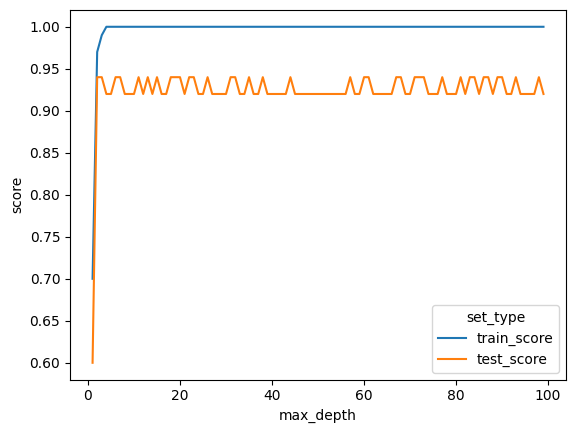

In [91]:
# sns.lineplot(x='max_depth', y='value', data=iris_scores_data_long)
sns.lineplot(x='max_depth', y='score', hue='set_type', data=iris_scores_data_long)

# Самостоятельная работа на кошках и собаках

In [114]:
animals_df = pd.read_csv('dogs_n_cats.csv')
animals_df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [121]:
X_animal_train = animals_df.drop(['Вид'], axis=1)
X_animal_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0


In [ ]:
y_animal_train = animals_df['Вид']

In [97]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
clf.fit(X_animal_train, y_animal_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [98]:
animals_test_df = pd.read_json('dataset_209691_15.txt')
animals_test_df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,21,25.2,1,1,0
1,19,22.8,1,1,0
2,20,24.0,1,1,0
3,34,40.8,1,1,0
4,29,34.8,1,1,0


In [99]:
X_animal_test = animals_test_df.copy()

In [118]:
predicted_animals = pd.DataFrame(clf.predict(X_animal_test))
predicted_animals.rename({0: 'species'}, inplace=True, axis=1)
predicted_animals.head()

,species
0,собачка
1,собачка
2,собачка
3,собачка
4,собачка


In [116]:
predicted_animals.query("species == 'собачка'").count()

species    55
dtype: int64

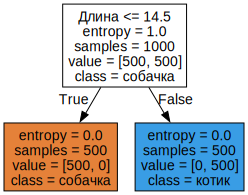

In [120]:
animal_graph = Source(tree.export_graphviz(clf, feature_names=list(X_animal_train), class_names=['собачка', 'котик'], filled=True))
display(SVG(animal_graph.pipe(format='svg')))